<a href="https://colab.research.google.com/github/SangeethaPaulraj26/DataScience/blob/main/Construction_Delay_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv('/content/sample_data/train.csv')  # Adjust path for your dataset
df.head()


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [3]:
print(df.shape)
print(df.info())
print(df.describe())
print(df.columns)


(9800, 18)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dt

In [4]:
print(df.isnull().sum())
df = df.dropna()  # Or df.fillna(method='ffill')


Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code      11
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
dtype: int64


In [10]:

# Check again# Convert date columns with day-first format
df['Order Date'] = pd.to_datetime(df['Order Date'], dayfirst=True)
df['Ship Date'] = pd.to_datetime(df['Ship Date'], dayfirst=True)

# Confirm
print(df[['Order Date', 'Ship Date']].head())

df.info()



  Order Date  Ship Date
0 2017-11-08 2017-11-11
1 2017-11-08 2017-11-11
2 2017-06-12 2017-06-16
3 2016-10-11 2016-10-18
4 2016-10-11 2016-10-18
<class 'pandas.core.frame.DataFrame'>
Index: 9789 entries, 0 to 9799
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Order ID       9789 non-null   object        
 1   Order Date     9789 non-null   datetime64[ns]
 2   Ship Date      9789 non-null   datetime64[ns]
 3   Ship Mode      9789 non-null   object        
 4   Customer ID    9789 non-null   object        
 5   Customer Name  9789 non-null   object        
 6   Segment        9789 non-null   object        
 7   Country        9789 non-null   object        
 8   City           9789 non-null   object        
 9   State          9789 non-null   object        
 10  Region         9789 non-null   object        
 11  Product ID     9789 non-null   object        
 12  Category       9789 non-null   obje

In [11]:
# Total and average sales
total_sales = df['Sales'].sum()
average_sales = df['Sales'].mean()

print(f"Total Sales: ${total_sales:,.2f}")
print(f"Average Sales: ${average_sales:.2f}")


Total Sales: $2,252,607.41
Average Sales: $230.12


<ipython-input-12-21bc318aece9>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=segment_sales.index, y=segment_sales.values, palette="viridis")


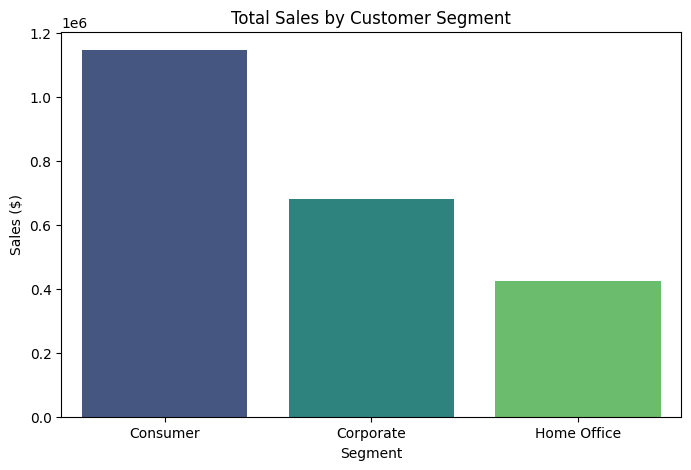

In [12]:
# Group by Segment
segment_sales = df.groupby('Segment')['Sales'].sum().sort_values(ascending=False)

# Visualize
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.barplot(x=segment_sales.index, y=segment_sales.values, palette="viridis")
plt.title("Total Sales by Customer Segment")
plt.ylabel("Sales ($)")
plt.xlabel("Segment")
plt.show()


<ipython-input-13-c7a5e5f1157d>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=region_sales.index, y=region_sales.values, palette="coolwarm")


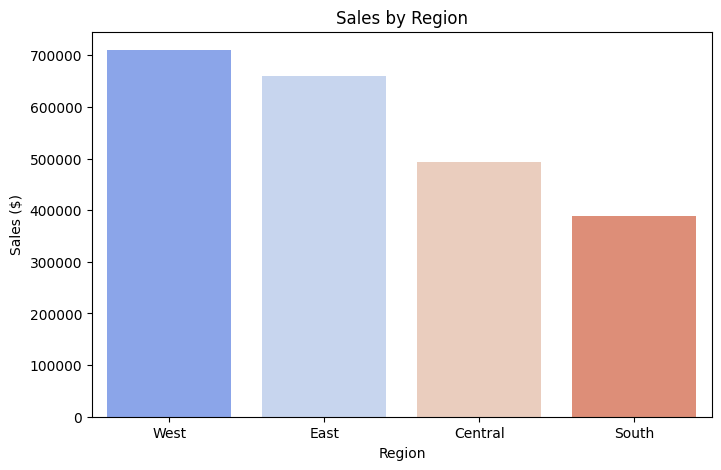

In [13]:
region_sales = df.groupby('Region')['Sales'].sum().sort_values(ascending=False)

plt.figure(figsize=(8,5))
sns.barplot(x=region_sales.index, y=region_sales.values, palette="coolwarm")
plt.title("Sales by Region")
plt.ylabel("Sales ($)")
plt.xlabel("Region")
plt.show()


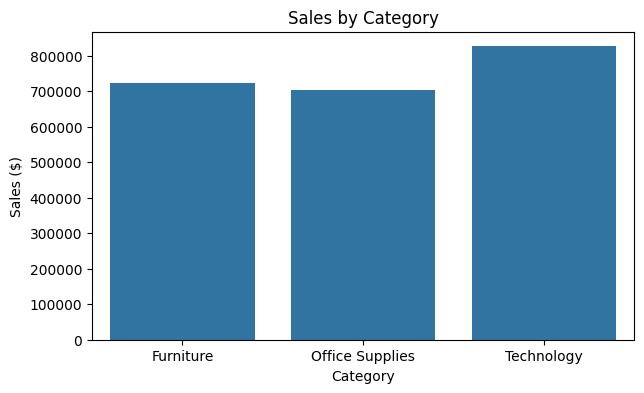

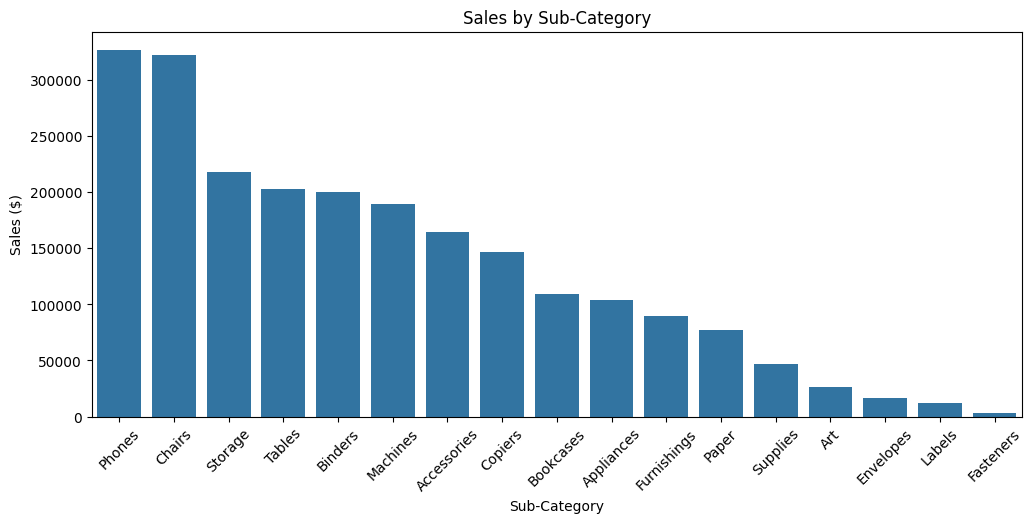

In [14]:
# Category-level
category_sales = df.groupby('Category')['Sales'].sum()

plt.figure(figsize=(7,4))
sns.barplot(x=category_sales.index, y=category_sales.values)
plt.title("Sales by Category")
plt.ylabel("Sales ($)")
plt.xlabel("Category")
plt.show()

# Sub-Category-level
subcategory_sales = df.groupby('Sub-Category')['Sales'].sum().sort_values(ascending=False)

plt.figure(figsize=(12,5))
sns.barplot(x=subcategory_sales.index, y=subcategory_sales.values)
plt.title("Sales by Sub-Category")
plt.xticks(rotation=45)
plt.ylabel("Sales ($)")
plt.xlabel("Sub-Category")
plt.show()


<ipython-input-15-93a6cff1131c>:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = df['Sales'].resample('M').sum()


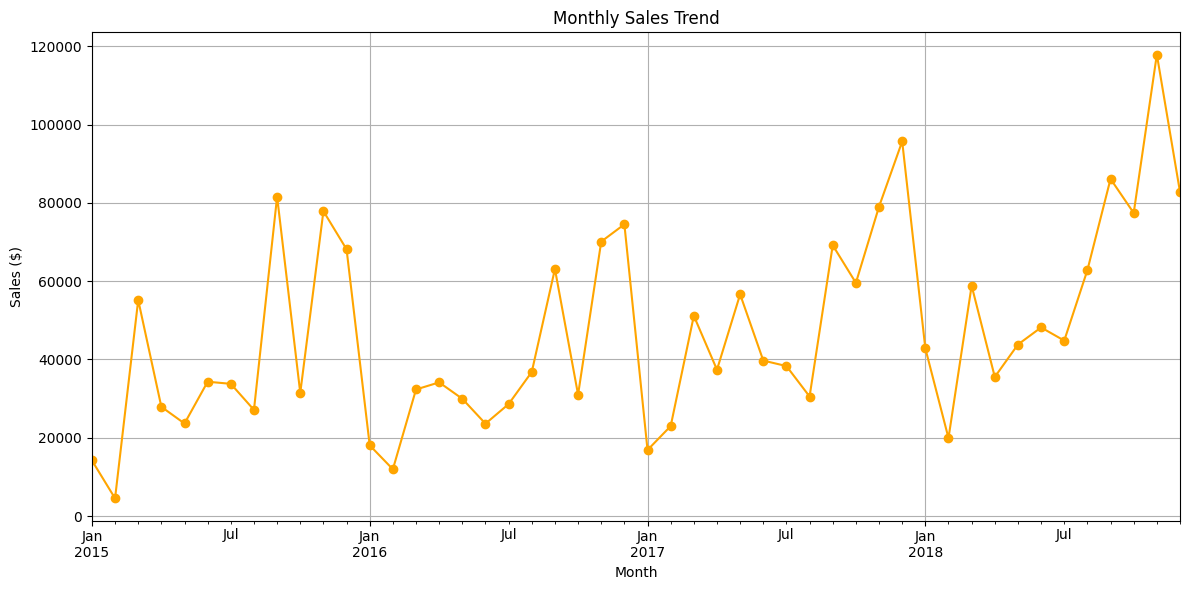

In [15]:
# Set Order Date as index
df.set_index('Order Date', inplace=True)

# Resample by month and sum sales
monthly_sales = df['Sales'].resample('M').sum()

# Plot
plt.figure(figsize=(12,6))
monthly_sales.plot(marker='o', color='orange')
plt.title("Monthly Sales Trend")
plt.ylabel("Sales ($)")
plt.xlabel("Month")
plt.grid(True)
plt.tight_layout()
plt.show()


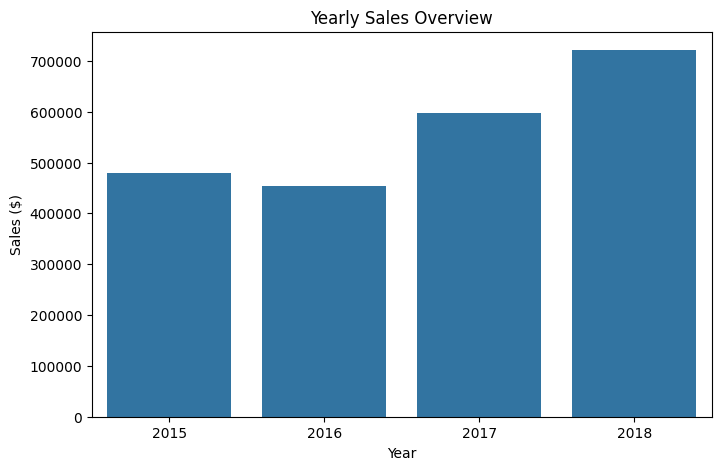

In [16]:
# Extract year from index
df['Year'] = df.index.year

# Group by year
yearly_sales = df.groupby('Year')['Sales'].sum()

plt.figure(figsize=(8,5))
sns.barplot(x=yearly_sales.index.astype(str), y=yearly_sales.values)
plt.title("Yearly Sales Overview")
plt.ylabel("Sales ($)")
plt.xlabel("Year")
plt.show()


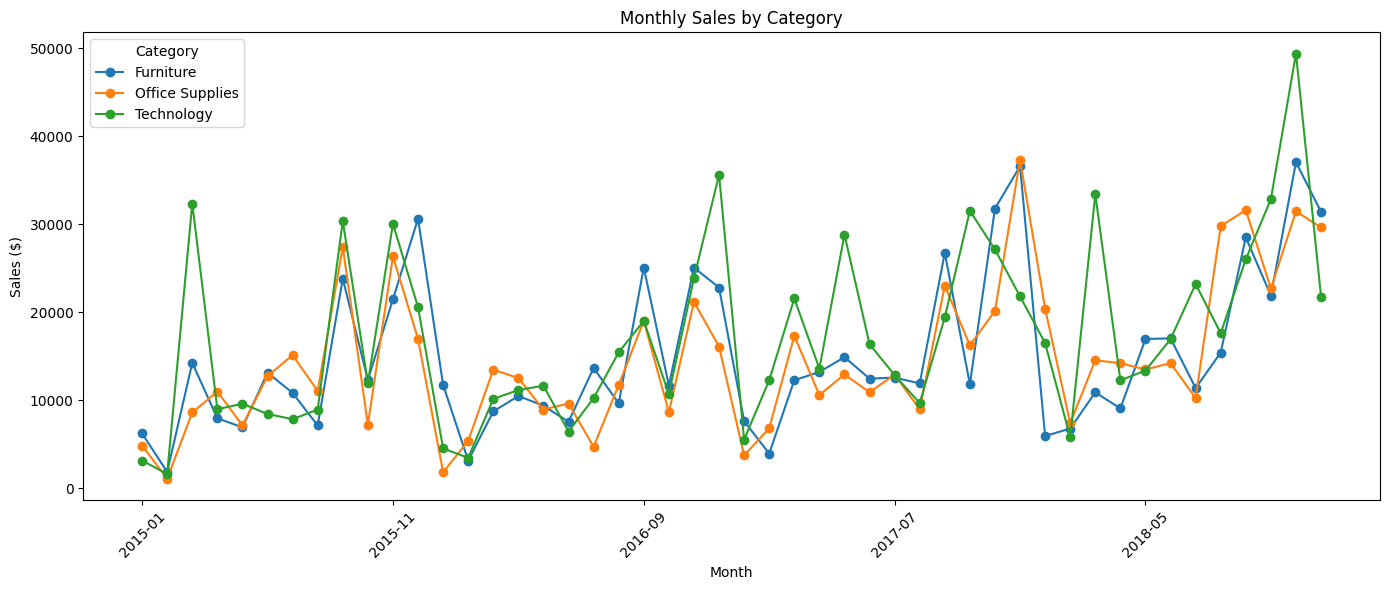

In [17]:
# Reset index for grouped analysis
df_reset = df.reset_index()

# Group by month & category
df_reset['Month'] = df_reset['Order Date'].dt.to_period('M').astype(str)
monthly_category = df_reset.groupby(['Month', 'Category'])['Sales'].sum().unstack()

# Plot
monthly_category.plot(figsize=(14,6), marker='o')
plt.title("Monthly Sales by Category")
plt.ylabel("Sales ($)")
plt.xlabel("Month")
plt.xticks(rotation=45)
plt.legend(title='Category')
plt.tight_layout()
plt.show()


In [18]:
# Calculate shipping delay
df['Ship Delay (Days)'] = (df['Ship Date'] - df.index).dt.days

# Quick look
print(df[['Ship Date', 'Ship Delay (Days)']].head())


            Ship Date  Ship Delay (Days)
Order Date                              
2017-11-08 2017-11-11                  3
2017-11-08 2017-11-11                  3
2017-06-12 2017-06-16                  4
2016-10-11 2016-10-18                  7
2016-10-11 2016-10-18                  7


<ipython-input-19-54285b2eb8d7>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ship_mode_delay.index, y=ship_mode_delay.values, palette='Set2')


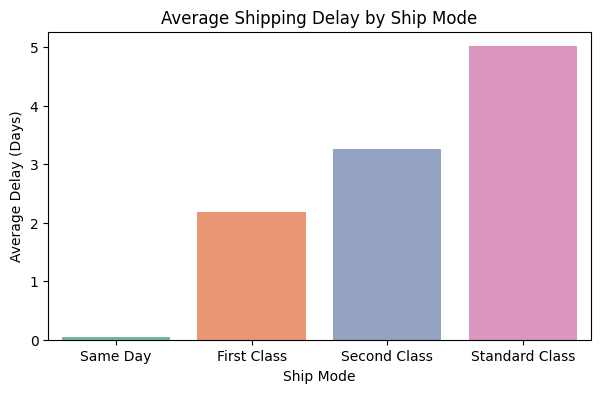

In [19]:
# Group by Ship Mode
ship_mode_delay = df.groupby('Ship Mode')['Ship Delay (Days)'].mean().sort_values()

# Plot
plt.figure(figsize=(7,4))
sns.barplot(x=ship_mode_delay.index, y=ship_mode_delay.values, palette='Set2')
plt.title("Average Shipping Delay by Ship Mode")
plt.ylabel("Average Delay (Days)")
plt.xlabel("Ship Mode")
plt.show()


<ipython-input-20-5e34f6e6ad11>:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_delay = df['Ship Delay (Days)'].resample('M').mean()


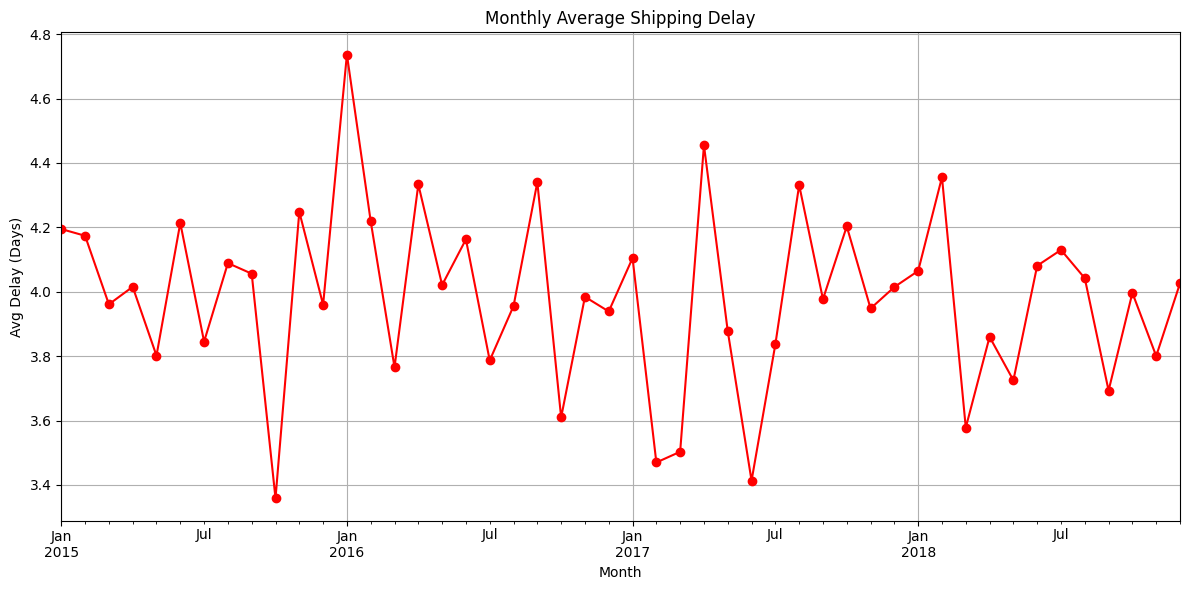

In [20]:
# Resample monthly
monthly_delay = df['Ship Delay (Days)'].resample('M').mean()

# Plot
plt.figure(figsize=(12,6))
monthly_delay.plot(marker='o', color='red')
plt.title("Monthly Average Shipping Delay")
plt.ylabel("Avg Delay (Days)")
plt.xlabel("Month")
plt.grid(True)
plt.tight_layout()
plt.show()


<ipython-input-21-39832181f22b>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=region_delay.index, y=region_delay.values, palette='crest')


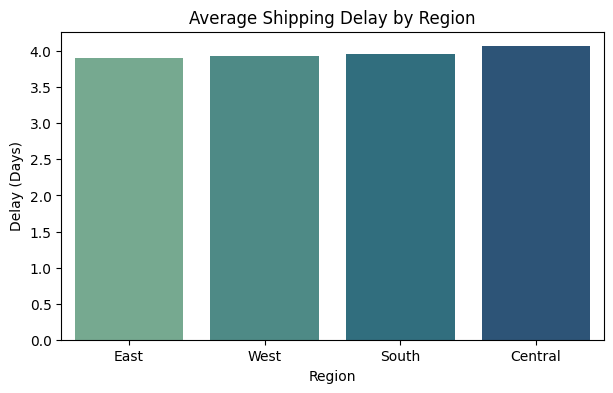

In [21]:
region_delay = df.groupby('Region')['Ship Delay (Days)'].mean().sort_values()

plt.figure(figsize=(7,4))
sns.barplot(x=region_delay.index, y=region_delay.values, palette='crest')
plt.title("Average Shipping Delay by Region")
plt.ylabel("Delay (Days)")
plt.xlabel("Region")
plt.show()
